In [ ]:
 import pandas as pd
data=pd.read_csv('/content/Cars.csv')
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as smf
import numpy as np


In [ ]:
data

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [ ]:
data.isna().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

In [ ]:
data.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


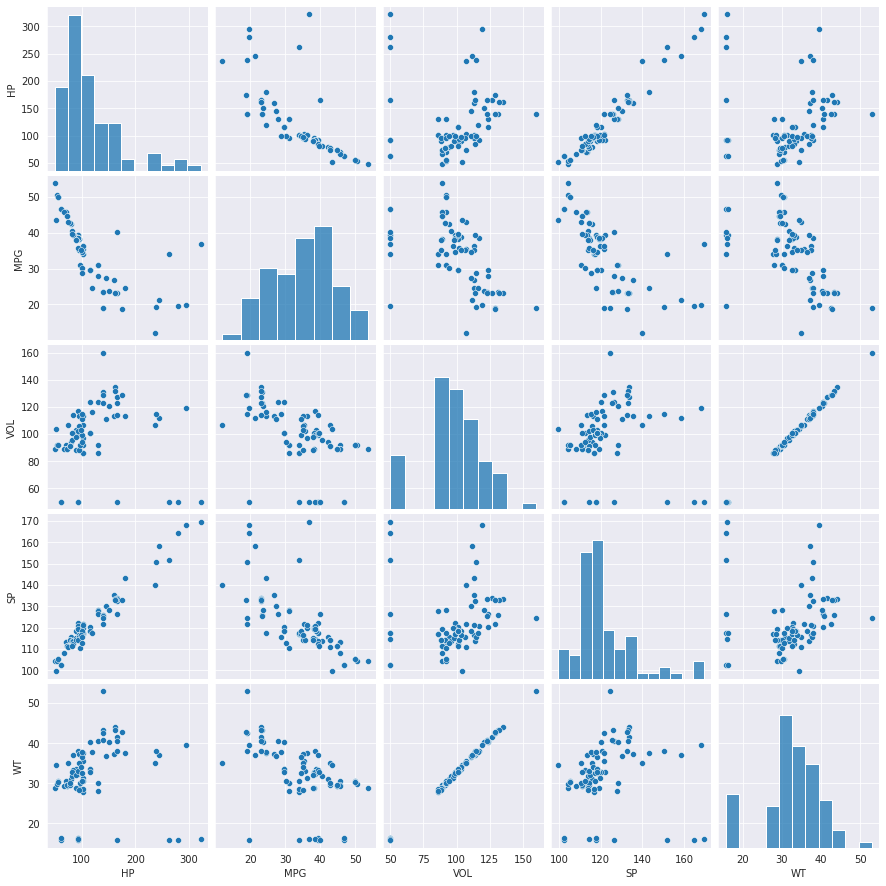

In [ ]:
sns.set_style(style='darkgrid')
sns.pairplot(data)

In [ ]:
#build the model
model=smf.ols('MPG~WT+VOL+SP+HP',data=data).fit()

In [ ]:
#coefficent beta value
model.params

Intercept    30.677336
WT            0.400574
VOL          -0.336051
SP            0.395627
HP           -0.205444
dtype: float64

In [ ]:
#t and p value :print (model .tvalue, model.pvalue)
print(print(model.tvalues ,'\n',model.pvalues))

Intercept    2.058841
WT           0.236541
VOL         -0.590970
SP           2.499880
HP          -5.238735
dtype: float64 
 Intercept    0.042936
WT           0.813649
VOL          0.556294
SP           0.014579
HP           0.000001
dtype: float64
None


In [ ]:
(model.rsquared,model.rsquared_adj)

(0.7705372737359842, 0.7584602881431413)

In [ ]:
model=smf.ols('MPG~VOL',data=data).fit()

In [ ]:
print(print(model.tvalues ,'\n',model.pvalues))

Intercept    14.106056
VOL          -5.541400
dtype: float64 
 Intercept    2.753815e-23
VOL          3.822819e-07
dtype: float64
None


In [ ]:
ml=smf.ols('MPG~WT',data=data).fit()

In [ ]:
print(ml.tvalues ,'\n',ml.pvalues)

Intercept    14.248923
WT           -5.508067
dtype: float64 
 Intercept    1.550788e-23
WT           4.383467e-07
dtype: float64


In [ ]:
ml=smf.ols('MPG~WT+VOL',data=data).fit()

In [ ]:
print(ml.tvalues ,'\n',ml.pvalues)

Intercept    12.545736
WT            0.489876
VOL          -0.709604
dtype: float64 
 Intercept    2.141975e-20
WT           6.255966e-01
VOL          4.800657e-01
dtype: float64


VIF


In [ ]:
rsq_hp =smf.ols(' HP~WT+VOL+SP',data=data).fit().rsquared
vif_hp=1/(1-rsq_hp)

rsq_Wt =smf.ols(' WT~HP+VOL+SP',data=data).fit().rsquared
vif_Wt=1/(1-rsq_Wt)

rsq_vol =smf.ols(' VOL~WT+HP+SP',data=data).fit().rsquared
vif_vol=1/(1-rsq_vol)

rsq_sp =smf.ols(' SP~WT+VOL+HP',data=data).fit().rsquared
vif_sp=1/(1-rsq_sp)

#storing vif vaules in data frame 
d1 ={'variables':['HP','WT','VOL','SP'],'VIF':[vif_hp,vif_Wt,vif_vol,vif_sp]}
vif_frame=pd.DataFrame(d1)
vif_frame

,variables,VIF
0,HP,19.926589
1,WT,639.533818
2,VOL,638.806084
3,SP,20.007639


In [ ]:
model=smf.ols('MPG~WT+SP+HP',data=data).fit()
print (model.aic,rsq_Wt)

476.29927501529767 0.9984363610296332


In [ ]:
model=smf.ols('MPG~VOL+SP+HP',data=data).fit()
print (model.aic,rsq_vol)#feature which give high rsq value and low aic value

475.9875158854609 0.9984345797174133


Residual analysis


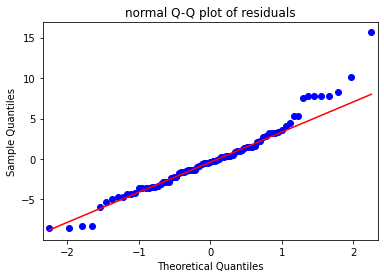

In [ ]:
import statsmodels.api as sm
model=smf.ols('MPG~VOL+SP+HP',data=data).fit()#model.resid is error
qqplot=sm.qqplot(model.resid,line='q')#line =45 to draw the diagonal line
plt.title('normal Q-Q plot of residuals')# points that are away from line are outliers
plt.show()# here some values are more than 10 y value

In [ ]:
#to print index of vaules whoes y values is more than 10
list(np.where(model.resid>10))

[array([ 0, 76])]

residul plot for homoscedasticity :constant cariance

In [ ]:
#model =


In [ ]:
#funcation  defintion fro standardization ie z score  , function name : get_satndardized_vaule
def get_satndardized_vaule (vals):
  return (vals -vals.mean())/vals.std()

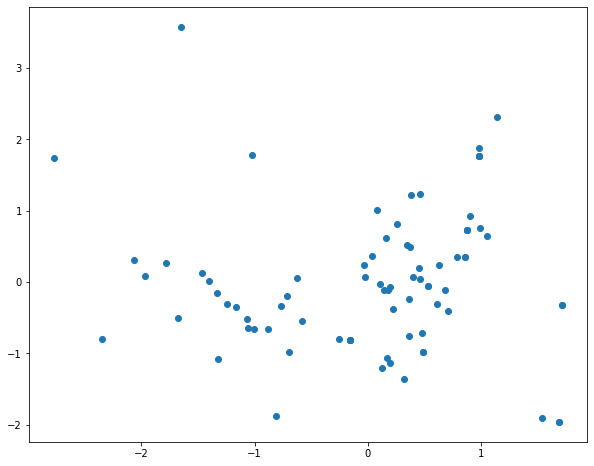

In [ ]:
plt.figure(figsize=(10,8))
plt.scatter(get_satndardized_vaule(model.fittedvalues),
            get_satndardized_vaule(model.resid))

Residual vs regressors

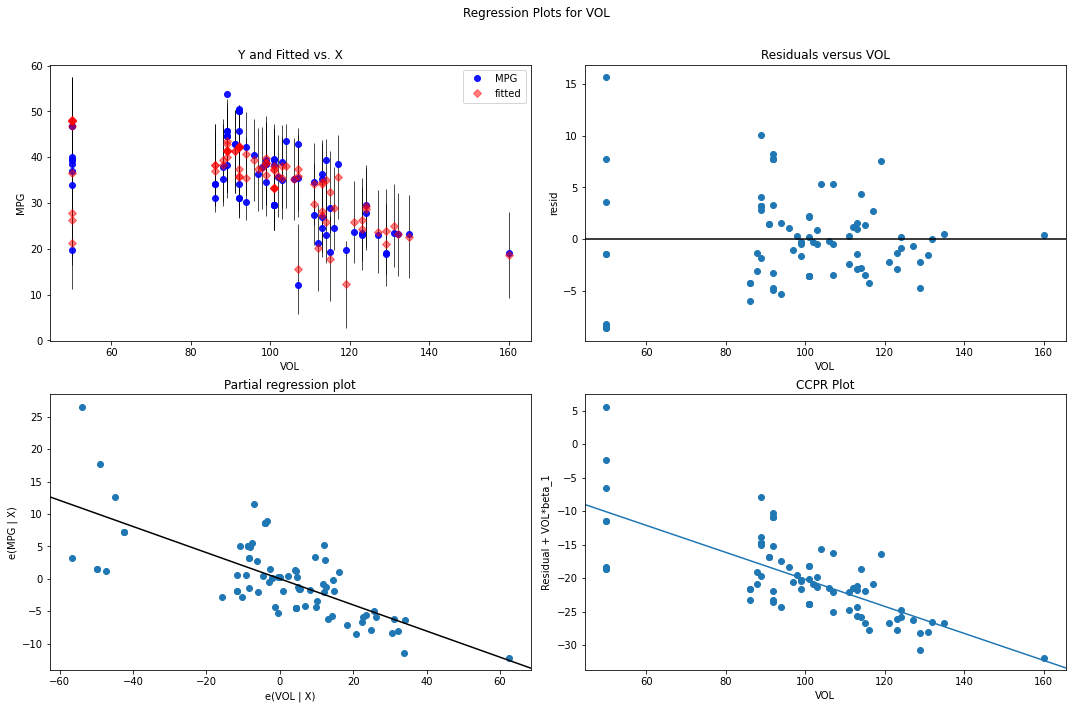

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model ,'VOL',fig=fig)
plt.show()

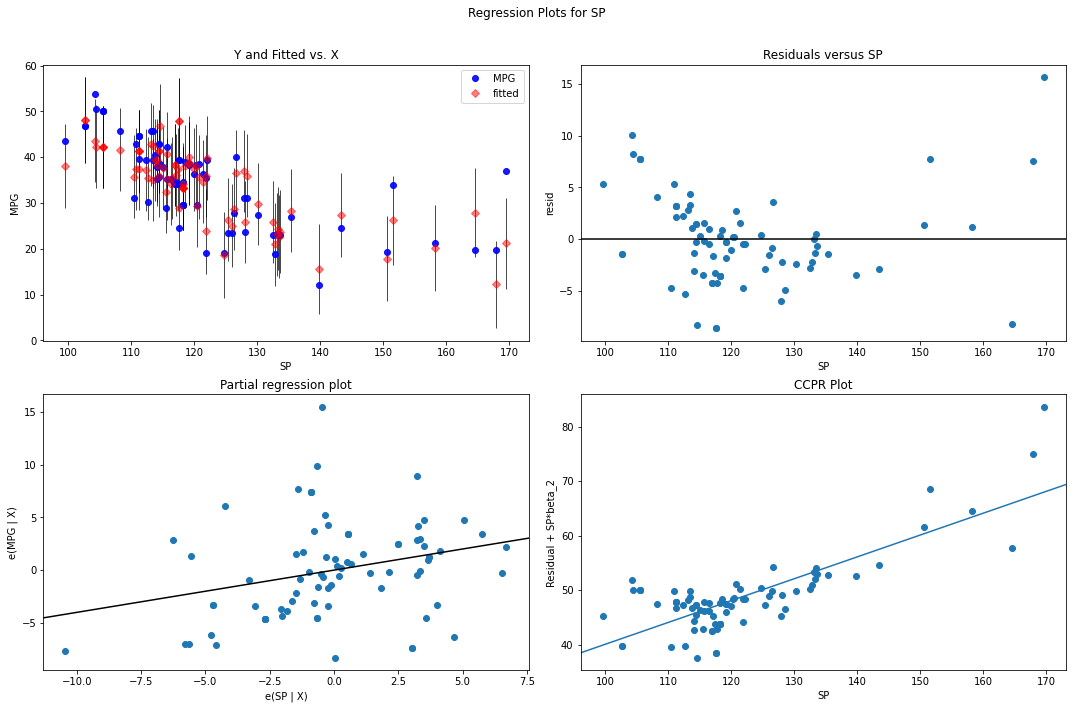

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model ,'SP',fig=fig)
plt.show()

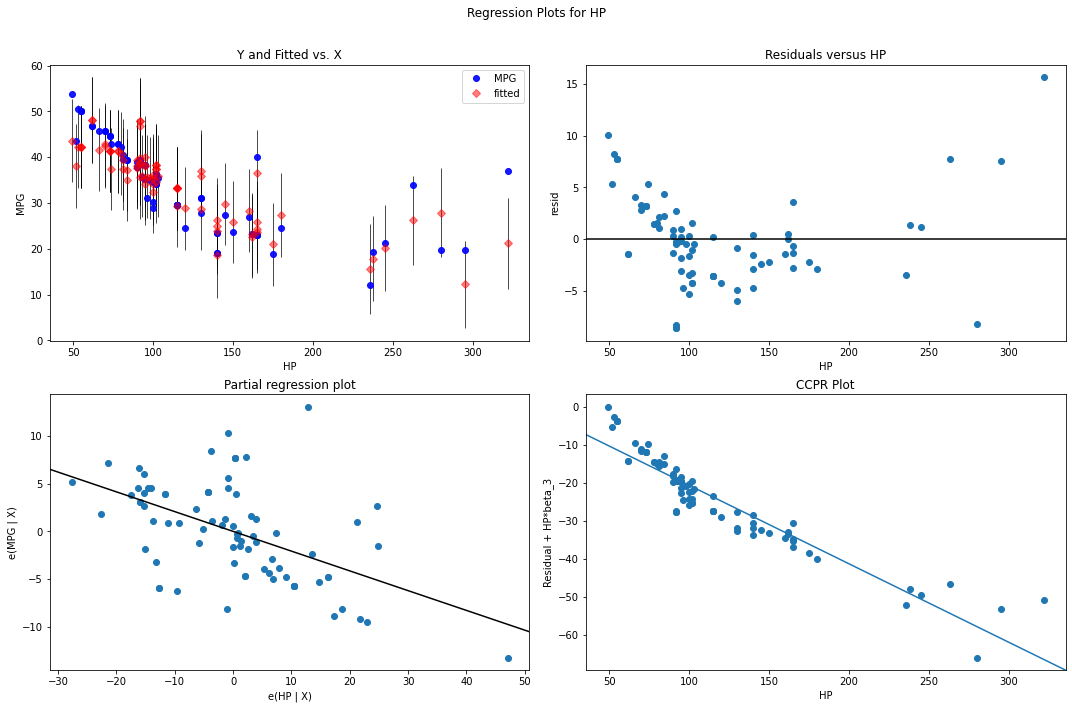

In [ ]:
fig=plt.figure(figsize=(15,10))
fig=sm.graphics.plot_regress_exog(model ,'HP',fig=fig)
plt.show()

COOKS DISTANCE


In [ ]:
model_influence=model.get_influence()
(c,_)=model_influence.cooks_distance

<ipython-input-31-f7afd9d3c36a>:2: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  plt.stem(np.arange(len(data)),np.round(c,3))


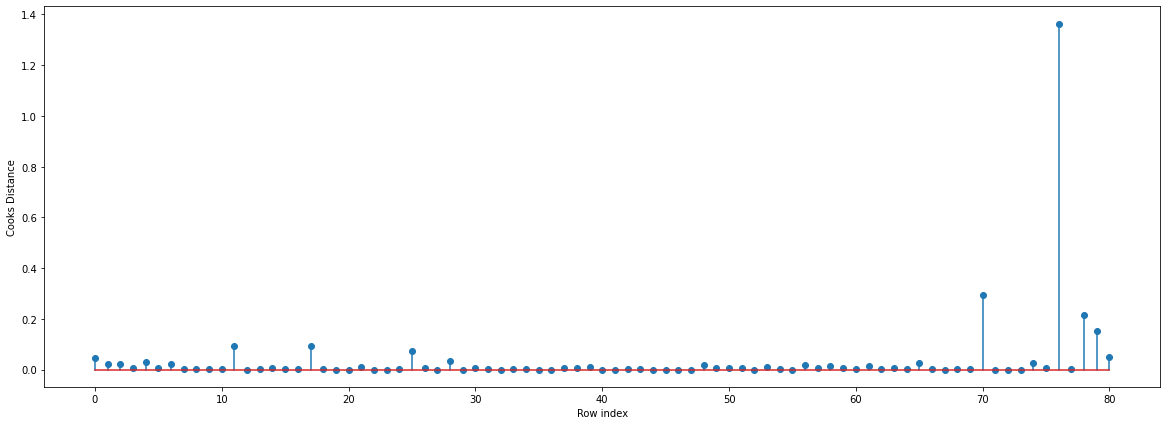

In [ ]:
fig=plt.subplots(figsize=(20,7))
plt.stem(np.arange(len(data)),np.round(c,3))
plt.xlabel('Row index')
plt.ylabel('Cooks Distance')
plt.show()

In [ ]:
(np.argmax(c),np.max(c))#will give first index value nd max ditance

(76, 1.364174386910332)

In [ ]:
HIGH INFLUENCE POINTS

In [ ]:
HIGH INFLUENCE POINTS

In [ ]:
HIGH INFLUENCE POINTS

SyntaxError: ignored

In [ ]:
data.shape

(81, 5)

In [ ]:
k=data.shape[1]#k is no of variables
n = data.shape[0]# no of data points
leverage_cutoff = 3*((k+1)/n)

In [ ]:
leverage_cutoff

0.2222222222222222

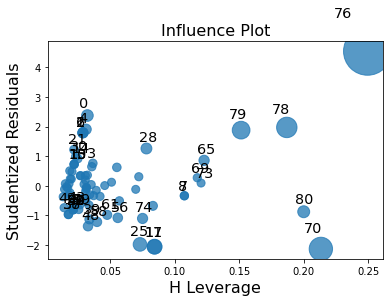

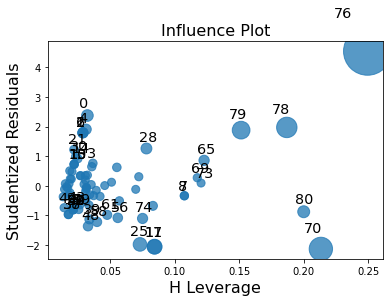

In [ ]:
from statsmodels.graphics.regressionplots import influence_plot
import matplotlib.pyplot as plt
influence_plot(model,alpha=0.5)

y=[i for i in range (-2,8
)]